# Markovské řetězce a hromadná obsluha

In [3]:
from collections import Counter
import math

from IPython.display import Image
import numpy as np
from numpy.linalg import inv
import scipy.linalg as la
import scipy.stats as st

In [4]:
from fractions import Fraction
# pozor může být nepřesné
def vystup_zlomky(matrix):
    for i in range(matrix.shape[0]):
        row = ""
        for j in range(matrix.shape[1]):
            row += str(Fraction(matrix[i, j]).limit_denominator())
            row += "\t"
        print(row)

# Markovský řetězec

Náhodný proces ${Xn | n ∈ N0}$ s nejvýše spočetnou množinou stavů $S$ nazýváme markovský řetězec s diskrétním časem, pokud splňuje markovskou podmínku, tj. pokud $∀n ∈ N, a ∀s, s_0, . . . , s_{n−1} \in S$ platí

$$P(X_n = s|X_{n−1} = s_{n−1}, \cdots, X_1 = s_1, X_0 = s_0) = P(X_n = s|X_{n−1} = s_{n−1})$$

## Stacionární rozdělení

https://marast.fit.cvut.cz/cs/problems/10180

Buď ${X_n | n \in \mathbb{N}_0}$ homogenní markovský řetězec s maticí přechodu $\textbf{P}$.

Pokud existuje vektor $\pi$ takový, že

- $\forall i \in S: \pi_i \ge 0$,
- $\sum{i \in S}{\pi_i = 1}$,

pro který platí, že

$$\pi * \textbf{P}^T = \pi$$

nazýváme jej *stacionárním rozdělením řetězce*.

In [5]:
# DATA

# TODO: NASTAVIT
matice = np.matrix([
    [0.5,0.5,0,0,0],
    [1,0,0,0,0],
    [0,0.5,0,0,0.5],
    [0,0,1,0,0],
    [0,0,0,1,0]
])

# PROGRAM
def stacionarni_rozdeleni(matrix):
    W = np.transpose(matrix - np.eye(matrix.shape[0])) 
    pi = la.null_space(W)
    pi = np.transpose(pi/sum(pi))
    return pi

_res = stacionarni_rozdeleni(matice)
print("Stacionární rozdělení =")
vystup_zlomky(_res)

Stacionární rozdělení =
2/3	1/3	0	0	0	


$\mathbf{T}$ je čtvercová matice přechodů mezi přechodnými stavy v $T$,

## Fundamentální matice

Matice $N = (I - T)^{-1}$ se nazývá *fundamentální matice řetězce*.

In [6]:
# DATA

# TODO: NASTAVIT
# matice T
matice_t = np.matrix([
    [0, 1/2],
    [1/2, 0],            
])

# PROGRAM
def fundamentalni_matice(matrix_t):
    return inv(np.eye(matrix_t.shape[0]) - matrix_t)

_res = fundamentalni_matice(matice_t)
print("Fundamentální matice =")
vystup_zlomky(_res)

Fundamentální matice =
4/3	2/3	
2/3	4/3	


## Pravděpodobnost pohlcení

Pro matici pravděpodobností pohlcení platí

$$U = N \cdot R = (I - T)^{-1}R$$

Matice přechodu $\textbf{P}$ má tvar

$ \textbf{P} =
\begin{pmatrix}
\textbf{T} & \textbf{R} \\
\textbf{0} & \textbf{C}
\end{pmatrix}
$

- $\textbf{R}$ je matice přechodů z přechodných DO trvalých stavů
- $\textbf{C}$ je matice přechodů v rámci trvalých stavů
- $\textbf{T}$ je matice přechodů mezi přechodnými stavy
- $\textbf{I}$ je identita ($\textbf{E}$)

In [7]:
# DATA

# TODO: NASTAVIT
# matice T
matice_t = np.matrix([
    [0,0, 1/2],
    [1/4, 1/4, 0],
    [0, 3/4, 1/4]
])
# matice R
matice_r = np.matrix([
    [1/2],[0],[0]
])

# PROGRAM
def pravdepodobnost_pohlceni(matrix_t, matrix_r):
    return fundamentalni_matice(matrix_t) * matrix_r

_res = pravdepodobnost_pohlceni(matice_t, matice_r)
print("Pravděpodobnost pohlcení =")
vystup_zlomky(_res)

Pravděpodobnost pohlcení =
3/5	
1/5	
1/5	


## Střední doba kroků do pohlcení

Pro matici $N = (I - T)^{-1}$ platí $N_{ik} := E(W_k|X_0=i)$, tj. $N_{ik}$ označuje *střední počet návštěv* stavu $k \in T$, jestliže řetězec startuje v $i \in T$. 


In [8]:
# DATA

# TODO: NASTAVIT
# matice T
matice_t = np.matrix([
    [0, 0, 1/2],
    [1/4, 1/4, 1/2],
    [0, 3/4, 1/4],            
])


# PROGRAM
def stredni_doba_kroku_do_pohlceni(matrix_t):
    N = fundamentalni_matice(matrix_t)
    print("Fundamentální matice")
    print(vystup_zlomky(N))
    return N * np.ones((matrix_t.shape[0],1))

_res = stredni_doba_kroku_do_pohlceni(matice_t)
print("vektor středních dob kroků do pohlcení =")
print(_res)
print("Hezky:")
vystup_zlomky(_res)

Fundamentální matice
2	4	4	
2	8	20/3	
2	8	8	
None
vektor středních dob kroků do pohlcení =
[[10.        ]
 [16.66666667]
 [18.        ]]
Hezky:
10	
50/3	
18	


## Matice skokových intenzit na matici přechodů

$$ P'(t) = P(t)Q$$

## Matice přechodů na matici skokových intenzit

$$ Q = P'(0)$$


## Pravděpodobnostní rozdělení v čase t

[https://marast.fit.cvut.cz/cs/problems/10788](https://marast.fit.cvut.cz/cs/problems/10788)

$$ p'(t) = p(t)Q$$
$$ p(0) = p_{initial}$$
p(0) je zadaný



## Formulace diskrétní řetězec na spojitý a naopak

$$ D := I + \frac{1}{\lambda}Q$$

$$ Q = \lambda(D-I)$$

# Markovský řetězec se spojitým časem


Poissonův proces - Náhodný process $\{Nt | t \geq 0 \}$ je čítací process
(counting process), jsou-li jeho trajektorie nezáporné, celočíselné a neklesající.

## Podmínky detailní rovnováhy

https://marast.fit.cvut.cz/cs/problems/10791


$$ \pi_i Q_{ij} = \pi_j Q_{ji}$$

$$ \sum_{i=0} \pi_i = 1$$

Pokud $\pi$ splňuje podmínky je stacionární, naopak to být nemusí - pro stacionární rozdělení řeším ještě $\pi\cdot Q = 0$

In [43]:
matice_q = np.array([
    [0,0 ,0,0,0 ],
    [7,-9,0,2,0],
    [0, 0, -1, 1, 0],
    [0,2,3,-10,5],
    [0,0,0,0,0],  
])

n = matice_q.shape[0]
matice_q = np.vstack([matice_q.T,[1,1,1,1,1]])

z = np.array(np.append(np.zeros(n),[1]))


[[  0   7   0   0   0]
 [  0  -9   0   2   0]
 [  0   0  -1   3   0]
 [  0   2   1 -10   0]
 [  0   0   0   5   0]
 [  1   1   1   1   1]] [0. 0. 0. 0. 0. 1.]


LinAlgError: Last 2 dimensions of the array must be square

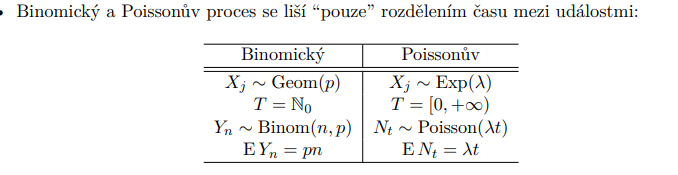

In [44]:
Image('imgs/poisson_vs_binom.PNG')


# Systém hromadné obsluhy

## Littleho věta a střední doby



$EN$ = střední počet zákazníků v systému

$ET$ = střední doba strávená zákazníkem v systému

$\lambda$ intenzita procesu příchodů

### Littleho věta

$$ EN = \lambda ET$$

### Další střední hodnoty

$$ET = E_\pi W + E_\pi S_j $$ 

$EW = $ Střední doba času stráveného zákazníkem ve frontě

$ES_j = \frac{1}{\mu} $ Střední doba obsluhy $j$-tého požadavku

Index $\pi$ znamená, vzhledem k stacionárnímu rozdělení

$$EN = EN_s + EN_f$$

$EN_s = $ střední počet zákazníků na serveru

$EN_f =$ střední počet zákazníků ve frontě

### Systém M|M|1

Stacionární rozdělení, existuje, pokud $\lambda < \mu$ 
$$ \pi_n = (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^n$$

$EN = \frac{\rho}{1-\rho}$

$EN_s = \rho$

$EN_f = \frac{\rho^2}{1-\rho}$

$\rho = \frac \lambda \mu $

Pravděpodobnost, že zákazník bude hned odbaven a nebude čekat.

$P(W = 0) = P(X_t = 0) = \pi_0 = 1-\rho = 1-\frac{\lambda}{\mu}$

Pravděpodobnost, že zákazník bude čekat alespoň dobu w, pokud bude čekat.

$P(W > w | W > 0) \sim Exp(\mu - \lambda)$

$P(W > w | W > 0) = e^{-(\mu - \lambda)w}$

### Systém $M|M|\infty$

Podmínka detailní rovnováhy:
$$ n\mu\pi_n = \lambda \pi_{n-1}$$

Stacionární rozdělení 

$$\pi_n = \frac{1}{n!}\left(\frac{\lambda}{\mu}\right)^n e^{-\frac{\lambda}{\mu}}$$


### Systém M|M|c

Stacionární rozdělení

Pokud $n \le c$
$$\pi_n  = \frac{1}{n!}\left(\frac{\lambda}{\mu}\right)^n \pi_0$$
jinak
$$\pi_n  = \frac{c^c}{c!}\left(\frac{\lambda}{c\mu}\right)^n \pi_0$$